useful: 
* https://stackoverflow.com/questions/48023982/pandas-finding-local-max-and-min
* https://blog.ytotech.com/2015/11/01/findpeaks-in-python/



In [1]:
from data_loader import load_names_from_web, holdout_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [3]:
dfraw = load_names_from_web(category="national", hide_pre_1937=True, use_existing_files=True)
dfraw.sample(5)

,state,year,name,M/F,count
715577,US,1998,Johnryan,M,5
97255,US,1939,Alvester,M,5
1100320,US,1984,Antoinette,F,651
714051,US,1998,Haralambos,M,6
923213,US,1960,Marnette,F,5


## for each name, describe its shape with mins, maxes, gaps (zeros)

In [4]:
df1 = dfraw.copy()
df1['name_g'] = df1['name'] + '_' + df1['M/F']
df1.drop(columns=['state', 'name', 'M/F'], inplace=True)
df1.head()

,year,count,name_g
0,2000,25957,Emily_F
1,2000,23085,Hannah_F
2,2000,19968,Madison_F
3,2000,17998,Ashley_F
4,2000,17712,Sarah_F


In [5]:
# fill gaps with zero (because I want moving averages)
    # do it by pivot -> fill na -> melt
    # later I mmight want to reduce the non-zero counts by 4
df2 = df1.pivot(columns='year', index='name_g', values='count')
df2.fillna(0, inplace=True)
df2.reset_index(inplace=True)
df2 = pd.melt(df2, id_vars='name_g', var_name='year', value_name='count')
df2.head()

,name_g,year,count
0,Aaban_M,1937,0.0
1,Aabha_F,1937,0.0
2,Aabid_M,1937,0.0
3,Aabidah_F,1937,0.0
4,Aabir_M,1937,0.0


In [6]:
df2.loc[df2['name_g']=='Samoya_F'].tail()

,name_g,year,count
8897327,Samoya_F,2018,0.0
9006099,Samoya_F,2019,0.0
9114871,Samoya_F,2020,0.0
9223643,Samoya_F,2021,0.0
9332415,Samoya_F,2022,5.0


In [7]:
moving_average_years = 3

In [8]:
# get moving averages to smooth things out. I don't want every point to look like a minima or maxima
moving_average_years = 3
df2.sort_values(['name_g', 'year'], inplace=True)
df2['ma_' + str(moving_average_years)] = (df2.groupby('name_g')['count']
                                      .transform(lambda x: x.rolling(window=moving_average_years, min_periods=1).mean()))
df2.tail()

,name_g,year,count,ma_3
8919303,Zzyzx_M,2018,5.0,1.666667
9028075,Zzyzx_M,2019,0.0,1.666667
9136847,Zzyzx_M,2020,0.0,1.666667
9245619,Zzyzx_M,2021,0.0,0.000000
9354391,Zzyzx_M,2022,0.0,0.000000


In [9]:
names = df2['name_g'].unique()
print(len(names))
names

108772


array(['Aaban_M', 'Aabha_F', 'Aabid_M', ..., 'Zyyanna_F', 'Zyyon_M',
       'Zzyzx_M'], dtype=object)

In [10]:
df2['type'] = np.nan
names = df2['name_g'].unique()
last_count = 0
for name in names:
    one_name = df2.loc[df2['name_g']==name]
    
    
    
    
    
    for index, row in df2.iterrows():
        if row['']
        print(row['c1'], row['c2'])
    
    


SyntaxError: expected ':' (515000686.py, line 12)

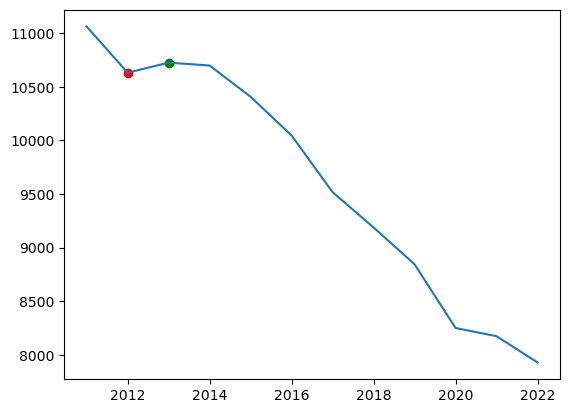

In [11]:
n = 3 #rolling period
# df = df2.loc[(df2['name_g']=='John_M')]
df = df2.loc[(df2['name_g']=='John_M') & (df2['year']>2010)]
# df = df2.loc[df2['name_g']=='Aaban_M']
# df = df2.loc[df2['name_g']=='Kizzie_F']
# df = df2.loc[(df2['name_g']=='Kizzie_F') & (df2['year']>1990)]

# one_name
local_min_vals = df.loc[df['count'] == df['count'].rolling(n, center=True).min()]
local_max_vals = df.loc[df['count'] == df['count'].rolling(n, center=True).max()]

plt.plot(df['year'], df['count'])
plt.scatter(local_min_vals['year'], local_min_vals['count'], c='r')
plt.scatter(local_max_vals['year'], local_max_vals['count'], c='g')




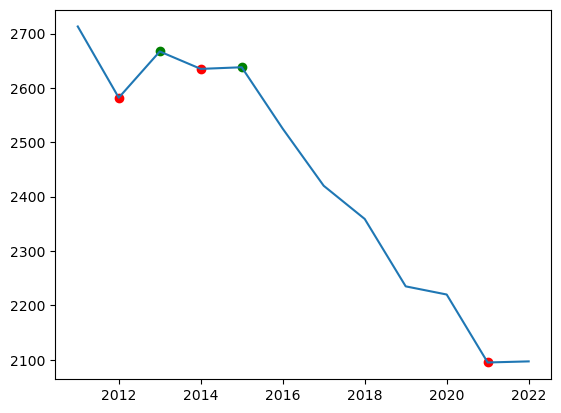

In [15]:
n = 3 #rolling period
# df = df2.loc[(df2['name_g']=='John_M')]
df = df2.loc[(df2['name_g']=='Mary_F') & (df2['year']>2010)]
# df = df2.loc[df2['name_g']=='Aaban_M']
# df = df2.loc[df2['name_g']=='Kizzie_F']
# df = df2.loc[(df2['name_g']=='Kizzie_F') & (df2['year']>1990)]

# one_name
local_min_vals = df.loc[df['count'] == df['count'].rolling(n, center=True).min()]
local_max_vals = df.loc[df['count'] == df['count'].rolling(n, center=True).max()]

plt.plot(df['year'], df['count'])
plt.scatter(local_min_vals['year'], local_min_vals['count'], c='r')
plt.scatter(local_max_vals['year'], local_max_vals['count'], c='g')

/var/folders/lb/1f9q5kds7h5c90s9vmqdd9qm0000gn/T/ipykernel_35447/1220741315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min'] = df['count'][(df['count'].shift(1) > df['count']) & (df['count'].shift(-1) > df['count'])]
/var/folders/lb/1f9q5kds7h5c90s9vmqdd9qm0000gn/T/ipykernel_35447/1220741315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max'] = df['count'][(df['count'].shift(1) < df['count']) & (df['count'].shift(-1) < df['count'])]


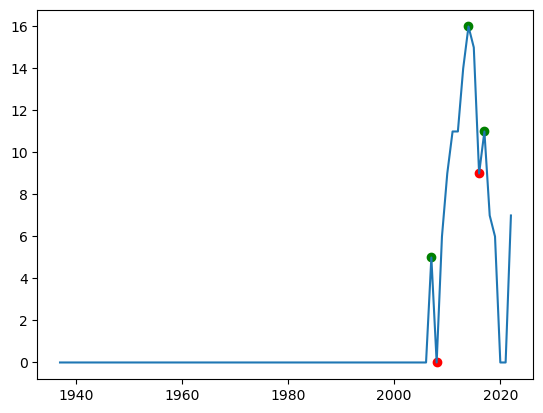

In [13]:
# Find local peaks
df['min'] = df['count'][(df['count'].shift(1) > df['count']) & (df['count'].shift(-1) > df['count'])]
df['max'] = df['count'][(df['count'].shift(1) < df['count']) & (df['count'].shift(-1) < df['count'])]

# Plot results
plt.scatter(df['year'], df['min'], c='r')
plt.scatter(df['year'], df['max'], c='g')
plt.plot(df['year'], df['count'])


In [63]:
df.tail(10)

,name_g,year,count,ma_3,type,min,max
8266672,Aaban_M,2013,14.0,12.000000,NaN,NaN,NaN
8375444,Aaban_M,2014,16.0,13.666667,NaN,NaN,16.0
8484216,Aaban_M,2015,15.0,15.000000,NaN,NaN,NaN
8592988,Aaban_M,2016,9.0,13.333333,NaN,9.0,NaN
8701760,Aaban_M,2017,11.0,11.666667,NaN,NaN,11.0
8810532,Aaban_M,2018,7.0,9.000000,NaN,NaN,NaN
8919304,Aaban_M,2019,6.0,8.000000,NaN,NaN,NaN
9028076,Aaban_M,2020,0.0,4.333333,NaN,NaN,NaN
9136848,Aaban_M,2021,0.0,2.000000,NaN,NaN,NaN
9245620,Aaban_M,2022,7.0,2.333333,NaN,NaN,NaN


In [52]:
df = df2.loc[df2['name_g']=='John_M']
n = 5  # number of points to be checked before and after

# Find local peaks
df['min'] = df.iloc[argrelextrema(df['count'], np.less_equal,
                    order=n)[0]]['count']
df['max'] = df.iloc[argrelextrema(df.data.values, np.greater_equal,
                    order=n)[0]]['data']

# Plot results

plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['data'])
plt.show()

ValueError: the 'mode' parameter is not supported in the pandas implementation of take()

In [36]:
local_min_vals

,name_g,year,count,ma_3,type
918139,John_M,1945,66117.0,67219.000000,NaN
1461999,John_M,1950,79417.0,81140.333333,NaN
2332175,John_M,1958,76027.0,78626.666667,NaN
4290071,John_M,1976,33991.0,35565.333333,NaN
8205863,John_M,2012,10630.0,11085.000000,NaN


In [37]:
local_max_vals

,name_g,year,count,ma_3,type
700595,John_M,1943,68927.0,64160.333333,NaN
1135683,John_M,1947,88319.0,77898.666667,NaN
1679543,John_M,1952,83134.0,81373.333333,NaN
2658491,John_M,1961,79927.0,77473.333333,NaN
2984807,John_M,1964,82523.0,79856.000000,NaN
4616387,John_M,1979,35416.0,34550.000000,NaN
5704107,John_M,1989,29854.0,29609.666667,NaN


In [4]:
def fill_gaps_and_calculate_moving_avg(df, moving_ave_years=5):
    df.sort_values(by=['name_g', 'year'], inplace=True)
    
    # Fill missing years with 0 for each name_g
    df_filled = (df.set_index('year')
                   .groupby('name_g')['count']
                   .apply(lambda x: x.reindex(range(x.index.min(), x.index.max() + 1), fill_value=0))
                   .reset_index())

    # 5-year moving average
    df_filled['moving_avg'] = (df_filled.groupby('name_g')['count']
                                      .transform(lambda x: x.rolling(window=moving_ave_years, min_periods=1).mean()))
    return df_filled

In [6]:


# SLOW





# df2 = fill_gaps_and_calculate_moving_avg(df1.copy(), 5)
# df2.head()

,name_g,year,count,moving_avg
0,Aaban_M,2007,5,5.000000
1,Aaban_M,2008,0,2.500000
2,Aaban_M,2009,6,3.666667
3,Aaban_M,2010,9,5.000000
4,Aaban_M,2011,11,6.200000


In [7]:
# Identify maxima, minima, gaps
def identify_events(df):
    df['type'] = np.nan  # Initialize the 'type' column

    for name_g in df['name_g'].unique():
        group = df[df['name_g'] == name_g]
        
        # Global maxima and minima (ignore global minima if series touches zero)
        global_max_year = group['moving_avg'].idxmax()
        if 0 not in group['count'].values:
            global_min_year = group['moving_avg'].idxmin()
            df.at[global_min_year, 'type'] = 'global minima'
        
        df.at[global_max_year, 'type'] = 'global maxima'
        
        # Local maxima and minima (ignoring minima for series that touch zero)
        for year in group.index[1:-1]:  # Ignore the first and last year for local checks
            prev, current, next_ = group.loc[year-1:year+1, 'moving_avg'].values
            if current > prev and current > next_:
                df.at[year, 'type'] = 'local maxima'
            elif current < prev and current < next_ and 0 not in group['count'].values:
                df.at[year, 'type'] = 'local minima'
                
        # Start and end of gaps
        gap_start_end = group['count'].eq(0) & group['count'].shift(-1).ne(0)
        gap_end_start = group['count'].eq(0) & group['count'].shift(1).ne(0)
        df.loc[gap_start_end.index[gap_start_end], 'type'] = 'end of gap'
        df.loc[gap_end_start.index[gap_end_start], 'type'] = 'start of gap'
    
    return df[df['type'].notna()]

In [34]:


# REALLY REALLY SLOW DON't DO IT




# df3 = identify_events(df2)
# df3 = df3[['name_g', 'year', 'type']].reset_index(drop=True)
# df3.head()

In [ ]:
'''
starting variables:
    x%
    recalc_ranges
    start_year
    end_year

-------
loop through time series, for each, loop through points:
    variables to track in the loop:
        this is first point in time series
        this point is zero
        last point was zero
        this is above upper range 1
            this is above upper range n
        this is below upper range 1
            this is below upper range n
    





    if this is the first point:
        calc upper_ranges
        calc lower_ranges
    if last point was zero...
    if next point is zero: (DO I TAKE INTO ACCOUNT IF DROP WAS GREATER THAN ONE GAP? YES)
		'out'
	elif next point is > upper range:
		'up'
		if recalc ranges (BASED ON LINE, NOT POINT)
	 elif next point < lower_range:
		...
'''